## Observations and Insights 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


# Checking the number of mice



In [73]:
# Checking the number of mice
# Get the unique values of 'Mouse ID' column
list_of_unique_mice = study_data_complete["Mouse ID"].unique()

length_of_unique_mice_list = len(list_of_unique_mice)
length_of_unique_mice_list

249

In [82]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice
# output should be ID of a single mouse

# dataframe that has duplicate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate_mouse = study_data_complete.drop_duplicates(['Mouse ID', 'Timepoint'])
drop_duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [84]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(drop_duplicate_mouse)
number_of_mice

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

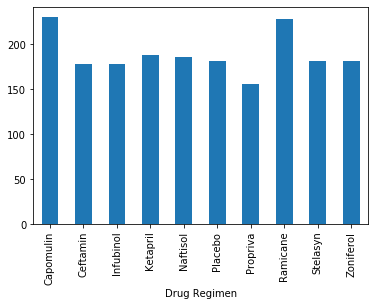

In [88]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_in_treatment = drop_duplicate_mouse.groupby(["Drug Regimen"])["Mouse ID"].count()
mice_in_treatment.plot(kind = "bar", x = "Drug Regimen", y = mice_in_treatment) 
mice_in_treatment

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



Sex
Female    930
Male      958
Name: Sex, dtype: int64

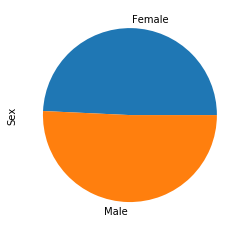

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

distribution_of_sexes = drop_duplicate_mouse.groupby(["Sex"])["Sex"].count()

distribution_of_sexes.plot(kind = "pie")
distribution_of_sexes

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drop_duplicate_mouse.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_timepoint,drop_duplicate_mouse,on=["Mouse ID", "Timepoint"],how="left")
tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [127]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
d = []
for p in tumor_volume .passing():
    d.append((p, p.team, p.passer_rating()))

pd.DataFrame(d, columns=('Player', 'Team', 'Passer Rating'))

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = study_data_complete['AveOccup'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
outlier_occupancy = study_data_complete.loc[(study_data_complete['AveOccup'] < lower_bound) | (study_data_complete['AveOccup'] > upper_bound)]
outlier_occupancy

KeyError: 'AveOccup'

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

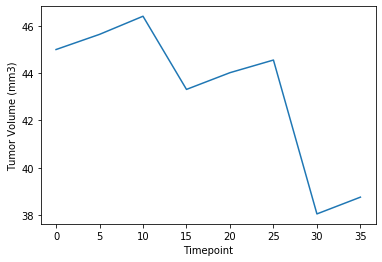

In [105]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice = drop_duplicate_mouse.loc[drop_duplicate_mouse["Drug Regimen"] == "Capomulin"]

mouse_id = capomulin_mice.loc[drop_duplicate_mouse["Mouse ID"] == "j246"] 
x = mouse_id["Timepoint"] 
y = mouse_id["Tumor Volume (mm3)"] 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x,y)

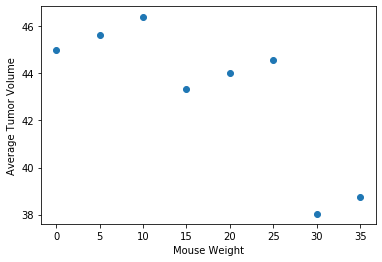

In [116]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.scatter(x,y)

## Correlation and Regression

In [124]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = study_data_complete.iloc[:,5]
volume = study_data_complete.iloc[:,7]
correlation = st.pearsonr(weight,volume)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'str'